In [313]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pip install statsmodels
import statsmodels.api as sm
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

#----------------------------------------------------
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support
#----------------------------------------------------

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier  
#----------------------------------------------------

from sklearn.linear_model import LogisticRegressionCV

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [314]:
df = pd.read_csv('brest_cancer_dataset.csv')
df.shape

(569, 32)

In [315]:
df.head(5)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


### I droped the ID column because it is irrelevent, and switched spaces with underscore (_)

In [316]:
df.drop(['id'], axis = 1, inplace = True)
df = df.rename(columns={'concave points_mean':'concave_points_mean', 'concave points_worst':'concave_points_worst', 'concave points_se':'concave_points_se'})
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


# Get a statistical summary of the numerical columns

In [317]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Check for missing values

In [318]:
nulls = df.isnull().sum()
nulls = nulls.sum()
print('There are', df.shape[0],'rows in the dataset')
print('There are', df.shape[1],'columns (features) in the dataset')
print('There are {}'.format(nulls),'nulls in the dataset')

There are 569 rows in the dataset
There are 31 columns (features) in the dataset
There are 0 nulls in the dataset


# Visualization of the features

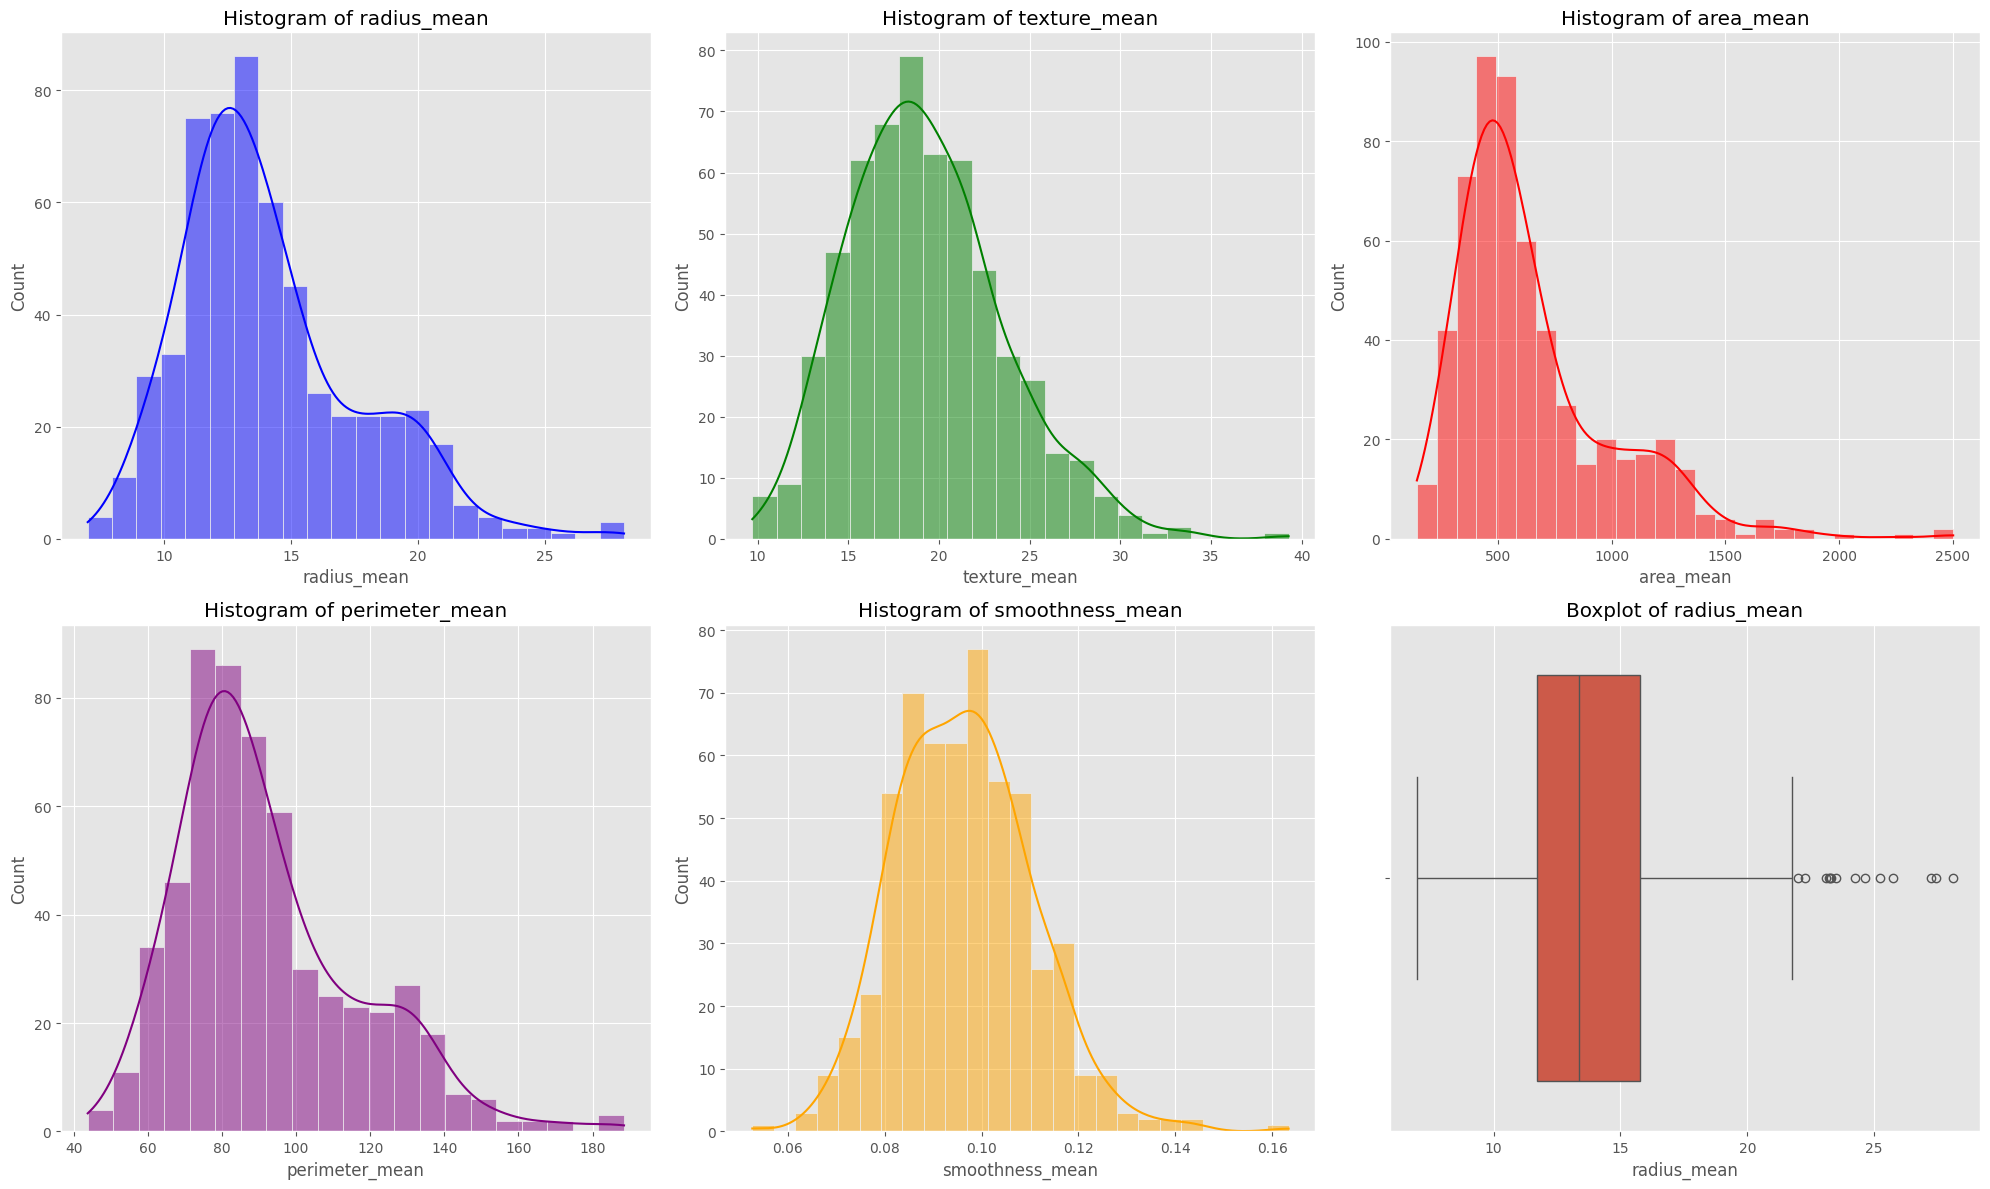

In [319]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))

# Histograms for 'radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean', and 'smoothness_mean'
sns.histplot(df['radius_mean'], kde=True, color="blue", ax=axs[0, 0])
axs[0, 0].set_title('Histogram of radius_mean')

sns.histplot(df['texture_mean'], kde=True, color="green", ax=axs[0, 1])
axs[0, 1].set_title('Histogram of texture_mean')

sns.histplot(df['area_mean'], kde=True, color="red", ax=axs[0, 2])
axs[0, 2].set_title('Histogram of area_mean')

sns.histplot(df['perimeter_mean'], kde=True, color="purple", ax=axs[1, 0])
axs[1, 0].set_title('Histogram of perimeter_mean')

sns.histplot(df['smoothness_mean'], kde=True, color="orange", ax=axs[1, 1])
axs[1, 1].set_title('Histogram of smoothness_mean')

# Boxplot for 'radius_mean'
sns.boxplot(x=df['radius_mean'], ax=axs[1, 2])
axs[1, 2].set_title('Boxplot of radius_mean')

plt.tight_layout()
plt.show()


### Histograms:

These histograms display the distribution of values for give key features: radius_mean, texture_mean, area_mean, perimeter_mean and smoothness_mean. 
Each histogram shows the frequency of data points within a range of values, helping to understand the spread and central tendencies of these measurements. 
The shape of the histogram (skewed) indicate the distribution type and highlight potential outliers or anomalies in the data.

### Boxplot (radius_mean):

The boxplot for radius_mean provides a summary of its distribution, showcasing the median, quartiles, and potential outliers. 
The central box represents the interquartile range (IQR), the line within the box shows the median, and the 'whiskers' extend to show the range of the data, excluding outliers. 
Points outside the whiskers are potential outliers, indicating unusually high or low measurements compared to the rest of the data.

## Scatter Plot between each pair


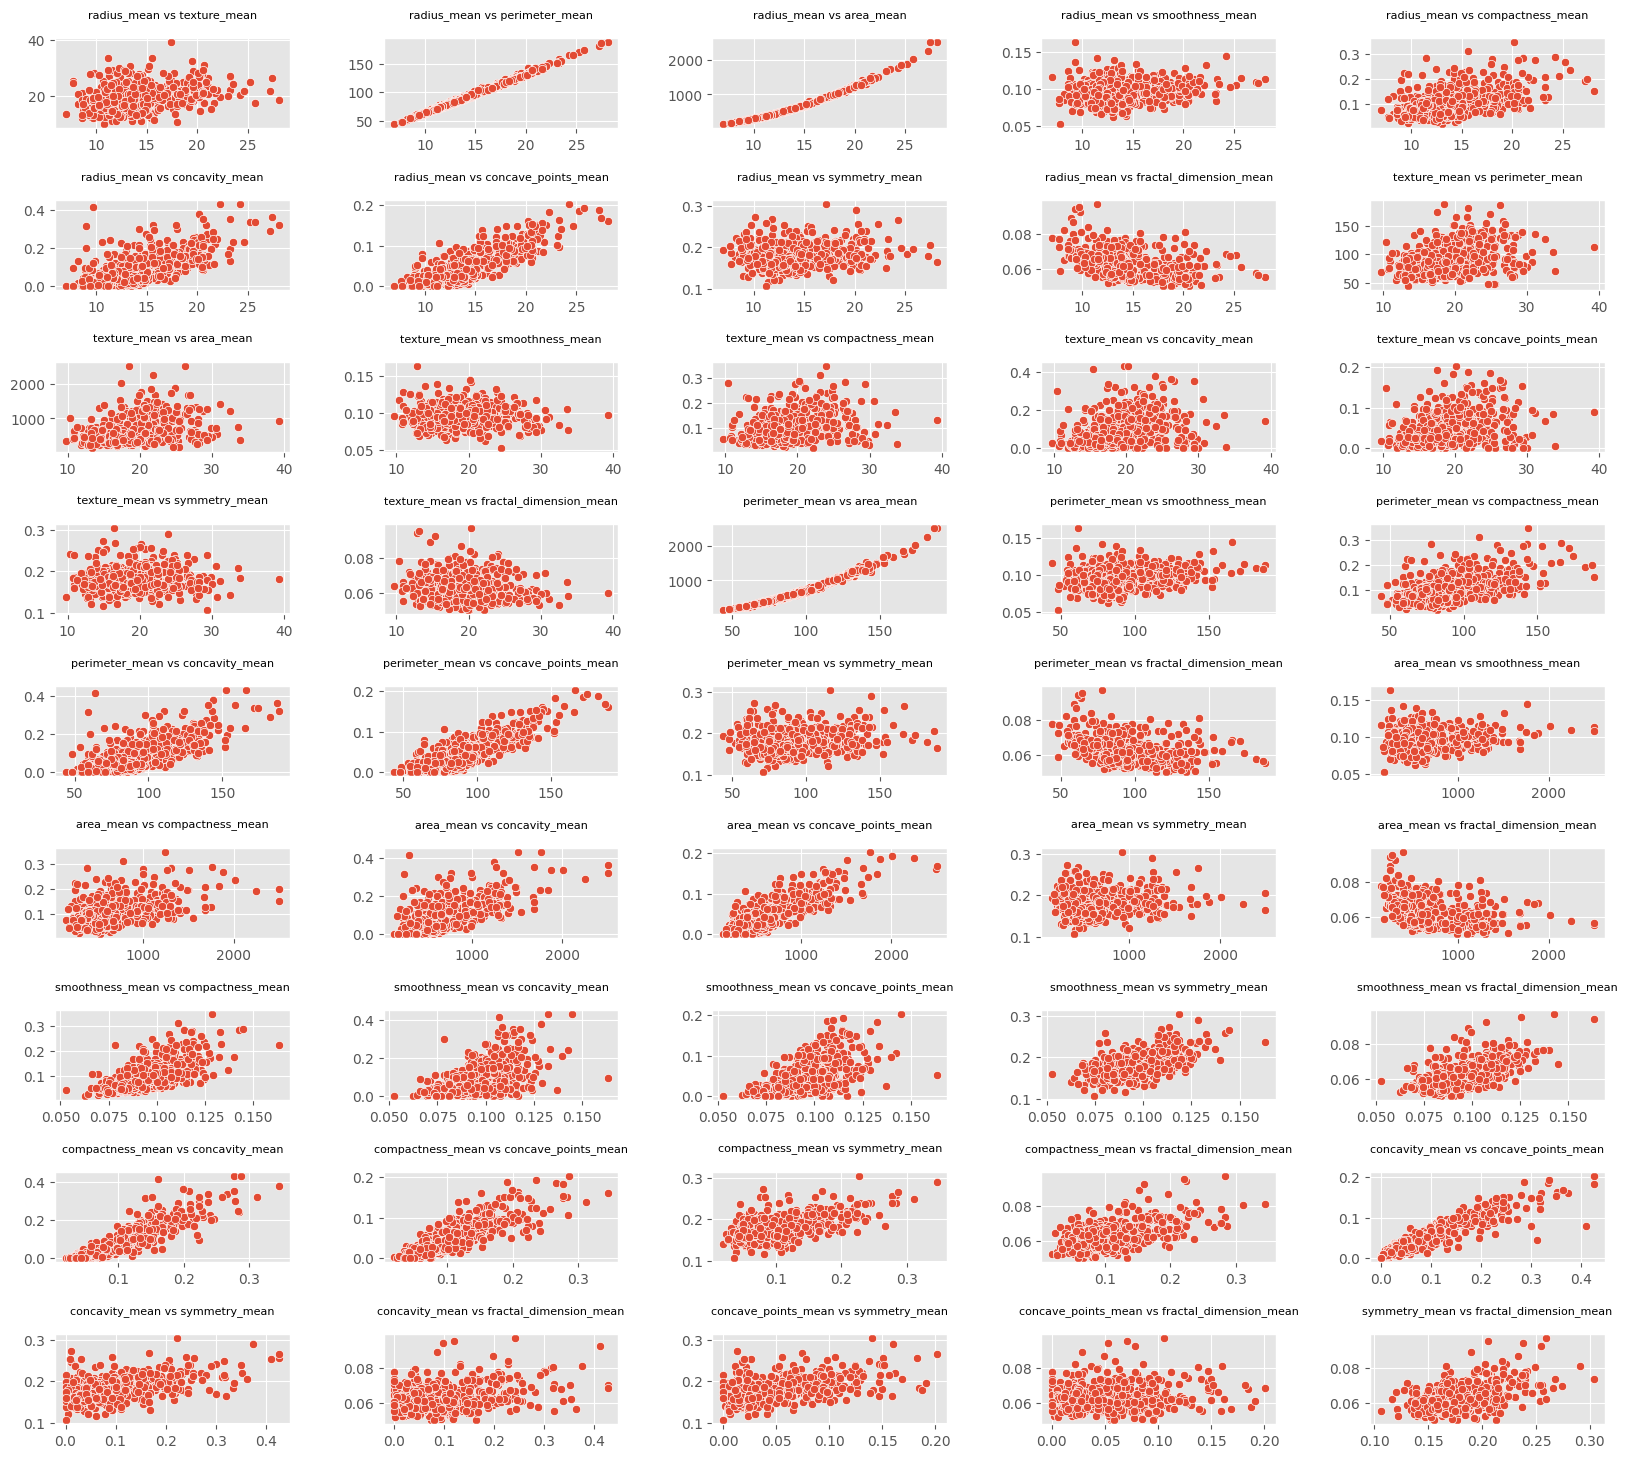

In [320]:
subset_columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']
# Calculate the number of unique pairs
num_plots = len(subset_columns) * (len(subset_columns) - 1) // 2

# Set up a grid for 45 pairs
plt.figure(figsize=(20, 18))
plot_number = 1

# Iterate through the combinations of columns
for i in range(len(subset_columns)):
    for j in range(i + 1, len(subset_columns)):
        plt.subplot(9, 5, plot_number)
        sns.scatterplot(x=subset_columns[i], y=subset_columns[j], data=df)
        plt.title(f'{subset_columns[i]} vs {subset_columns[j]}', fontsize=8, pad=15)
        plt.xlabel('') 
        plt.ylabel('')  
        plot_number += 1

plt.subplots_adjust(hspace=0.8, wspace=0.4)
plt.show()

### Scatter Plot:

This scatter plot visualizes the relationship between each pair. Each point on the plot corresponds to a single observation, with its position determined by the values of x-axis and y-axis. Patterns in the scatter plot can reveal correlations or trends between two features, such as a linear relationship, clusters, or lack of any discernible pattern.

# Correlation Heatmap


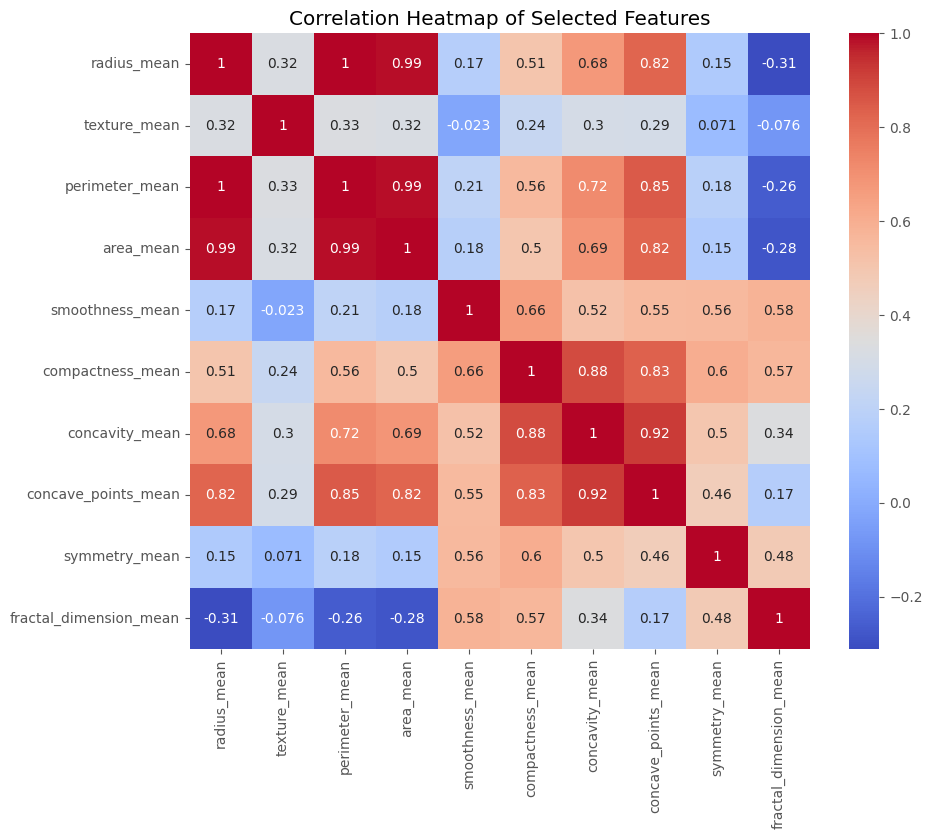

In [321]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[subset_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

### Correlation Heatmap (subset of features):

The correlation heatmap displays the correlation coefficients between pairs of features in the selected subset. Each cell in the heatmap shows the correlation between two features, with the color intensity and the annotation indicating the strength and direction of the relationship (ranging from -1 to 1). This visualization is useful for identifying features that are strongly correlated, either positively or negatively, which can be crucial for feature selection and understanding the underlying structure of the data.

# Now, let's try and determine the features importance

### Percentage of cancer and no breast cancer participants

In [322]:
count_no_cancer = len(df[df['diagnosis']=='B'])
count_cancer = len(df[df['diagnosis']=='M'])

precentage_no_cancer = count_no_cancer/(count_no_cancer+count_cancer)*100
precentage_of_cancer = count_cancer/(count_no_cancer+count_cancer)*100

print("No Breast Cancer: {:.2f}".format(precentage_no_cancer), '%')
print("Breast Cancer: {:.2f}".format(precentage_of_cancer), '%')

No Breast Cancer: 62.74 %
Breast Cancer: 37.26 %


### Convert 'M' to 1 and 'B' to 0 for the model usage 

In [323]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df['diagnosis'].unique()

array([1, 0], dtype=int64)

In [324]:
array = df.values
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [325]:
%pip install mglearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


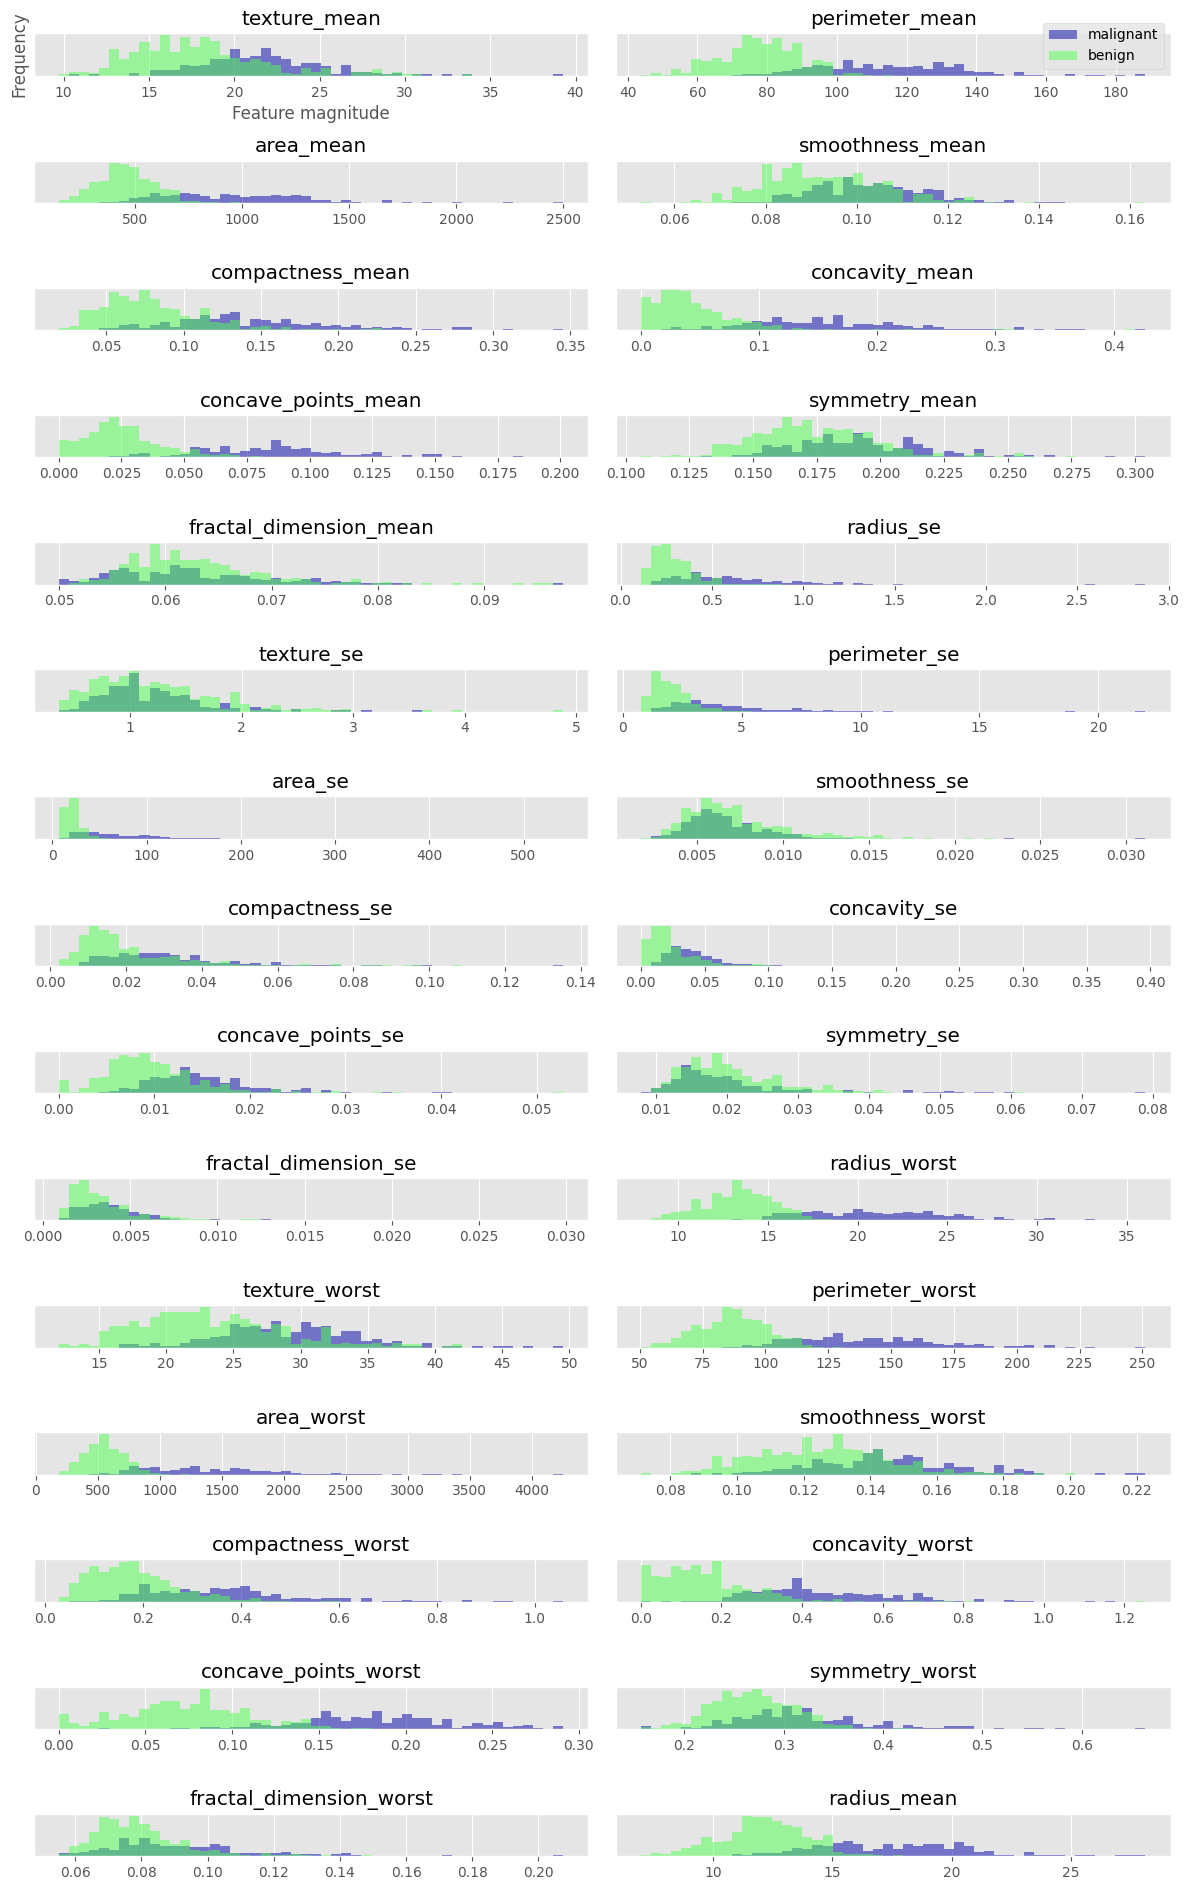

In [326]:
import mglearn

# Separate the dataset into malignant and benign based on 'diagnosis'
malignant = df[df['diagnosis'] == 1]
benign = df[df['diagnosis'] == 0]

# Setup the figure for plotting
fig, axes = plt.subplots(15, 2, figsize=(12, 19))
ax = axes.ravel()

for i in range(30): 
    _, bins = np.histogram(df.iloc[:, i], bins=50)
    ax[i-1].hist(malignant.iloc[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i-1].hist(benign.iloc[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i-1].set_title(df.columns[i])
    ax[i-1].set_yticks(())
    if i == 1:
        ax[i-1].set_xlabel("Feature magnitude")
        ax[i-1].set_ylabel("Frequency")
    if i == 2:
        ax[i-1].legend(["malignant", "benign"], loc="best")

fig.tight_layout()
plt.show()

We can see that there is a lot of overlapin of the 2 distributions.
However, looking at concave_points_worst there's a lot of variation in the 2 populations - so we'll probably get alot of information from this feature.

## Finding most significant features using OLS

Need to further deepen my understanding.

In [327]:
# Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y, X_1).fit()
model.pvalues

const                      0.000003
radius_mean                0.209985
texture_mean               0.567426
perimeter_mean             0.344641
area_mean                  0.545391
                             ...   
compactness_worst          0.860902
concavity_worst            0.156453
concave_points_worst       0.611751
symmetry_worst             0.260493
fractal_dimension_worst    0.071517
Length: 31, dtype: float64

In [328]:
# const                      0.000003
# radius_mean                0.209985
# texture_mean               0.567426
# perimeter_mean             0.344641
# area_mean                  0.545391
# smoothness_mean            0.966529
# compactness_mean           0.001635
# concavity_mean             0.181887
# concave_points_mean        0.279657
# symmetry_mean              0.890067
# fractal_dimension_mean     0.995240
# radius_se                  0.161800
# texture_se                 0.854525
# perimeter_se               0.584129
# area_se                    0.509235
# smoothness_se              0.017046
# compactness_se             0.976145
# concavity_se               0.006327
# concave_points_se          0.053103
# symmetry_se                0.534019
# fractal_dimension_se       0.540769
# radius_worst               0.000814
# texture_worst              0.303339
# perimeter_worst            0.681807
# area_worst                 0.001648
# smoothness_worst           0.705288
# compactness_worst          0.860902
# concavity_worst            0.156453
# concave_points_worst       0.611751
# symmetry_worst             0.260493
# fractal_dimension_worst    0.071517
# dtype: float64

Ordinary Least Squares (OLS) is a type of linear regression that estimates the relationship between one or more independent variables (features) and a dependent variable (outcome). The goal is to find the linear combination of the features that best predicts the outcome by minimizing the sum of the squared differences between the observed and predicted values.

P-values: In the context of regression, p-values indicate the significance of each independent variable in predicting the dependent variable. Specifically, it tests the null hypothesis that a particular coefficient is equal to zero (i.e., that the corresponding predictor has no effect on the dependent variable).

A small p-value (typically < 0.05) indicates that the variable is statistically significant, meaning it has a significant impact on predicting y.

A large p-value suggests that the variable is not significant and might not contribute much to the model.

## Finding most significant features using DecisionTreeClassifier

In [329]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X, y)

pd.set_option('display.max_rows', 30) #expand the cols to see all cols
pd.DataFrame({'Columns':X.columns, 'Importance':dt.feature_importances_}).sort_values(by='Importance', ascending=False)

,Columns,Importance
20,radius_worst,0.695594
27,concave_points_worst,0.112928
21,texture_worst,0.077284
15,compactness_se,0.031841
1,texture_mean,0.017721
24,smoothness_worst,0.014405
23,area_worst,0.011086
7,concave_points_mean,0.008771
28,symmetry_worst,0.007316
18,symmetry_se,0.006892


## Backward Elimination for feature selection (befs)

In [330]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        # if p-vals are > .05, they are not significant predictors so remove them.
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE) # final set of cols to use

['radius_mean', 'compactness_mean', 'concave_points_mean', 'radius_se', 'smoothness_se', 'concavity_se', 'concave_points_se', 'radius_worst', 'texture_worst', 'area_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']


## Feature selection using Lasso (Least Absolute Shrinkage and Selection Operator) with cross-validation (LassoCV)

Lasso is a type of linear regression that adds a penalty (L1 regularization) to the coefficients of the model. This penalty can shrink some coefficients to exactly zero, effectively performing feature selection.

In [331]:
X_fs = df.drop('diagnosis', axis=1)
y_fs = df['diagnosis']

reg = LassoCV()
# Reduce alpha to half of the optimal value to get more features.
# reg = Lasso(alpha=reg.alpha_ * 0.5)  
reg.fit(X_fs, y_fs)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.201830
Best score using built-in LassoCV: 0.661795


reg.alpha_: This is the best value of the regularization parameter alpha found by cross-validation. alpha controls the strength of the penalty applied to the model coefficients. A higher alpha means more regularization, which can lead to more coefficients being shrunk to zero.

reg.score(X, y): This line prints the R² score of the model, which measures how well the model explains the variance in the target variable. A higher score indicates a better fit.

In [332]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


Lasso picked 4 variables and eliminated the other 26 variables


The Lasso model performs feature selection by shrinking some feature coefficients to zero, effectively removing them from the model.

Text(0.5, 1.0, 'Feature importance using Lasso Model')

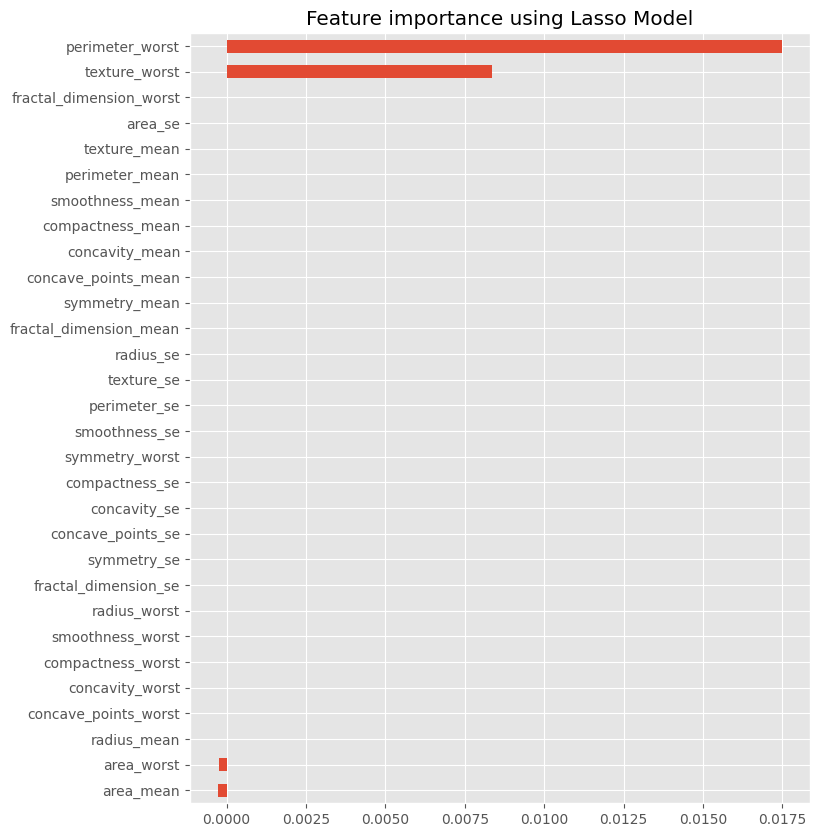

In [333]:
# From the entire dataset, LassoCV choose perimeter_worst, texture_worst, area_worst, and area_mean.
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# Dataset after choosing the features that are important based on my analysis (backwards elimination feature selection, lasso, feature importance)

In [334]:
dataset_befs=df[['diagnosis','radius_mean', 'compactness_mean', 'concave_points_mean', 'radius_se', 'smoothness_se',
            'concavity_se', 'concave_points_se', 'radius_worst', 'area_se', 'area_mean',
              'concave_points_worst','texture_worst', 'area_worst', 'concavity_worst', 'symmetry_worst',
              'fractal_dimension_worst', 'smoothness_worst', 'perimeter_worst']]

In [335]:
# can see the means of individual features, grouped by diagnosis
dataset_befs.groupby('diagnosis').mean()

,radius_mean,compactness_mean,concave_points_mean,radius_se,smoothness_se,concavity_se,concave_points_se,radius_worst,area_se,area_mean,concave_points_worst,texture_worst,area_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,smoothness_worst,perimeter_worst
diagnosis,,,,,,,,,,,,,,,,,,
0,12.146524,0.080085,0.025717,0.284082,0.007196,0.025997,0.009858,13.379801,21.135148,462.790196,0.074444,23.515070,558.899440,0.166238,0.270246,0.079442,0.124959,87.005938
1,17.462830,0.145188,0.087990,0.609083,0.006780,0.041824,0.015060,21.134811,72.672406,978.376415,0.182237,29.318208,1422.286321,0.450606,0.323468,0.091530,0.144845,141.370330


## Correlation Analysis
Checking for multicollinearity through correlation analysis. This helps in identifying and addressing issues that can affect model performance. Removing highly correlated features can reduce redundancy. Need ensure that the feature removed is not more predictive than the one retained.

In [336]:
dataset_fs = dataset_befs

df_fs_corr = dataset_fs.corr() #f inds linear pearson correlation
df_fs_corr = df_fs_corr[df_fs_corr < 1] # to avoid correlating values with themselves (ie corr = 1)
df_fs_corr

,diagnosis,radius_mean,compactness_mean,concave_points_mean,radius_se,smoothness_se,concavity_se,concave_points_se,radius_worst,area_se,area_mean,concave_points_worst,texture_worst,area_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,smoothness_worst,perimeter_worst
diagnosis,NaN,0.730029,0.596534,0.776614,0.567134,-0.067016,0.253730,0.408042,0.776454,0.548236,0.708984,0.793566,0.456903,0.733825,0.659610,0.416294,0.323872,0.421465,0.782914
radius_mean,0.730029,NaN,0.506124,0.822529,0.679090,-0.222600,0.194204,0.376169,0.969539,0.735864,0.987357,0.744214,0.297008,0.941082,0.526911,0.163953,0.007066,0.119616,0.965137
compactness_mean,0.596534,0.506124,NaN,0.831135,0.497473,0.135299,0.570517,0.642262,0.535315,0.455653,0.498502,0.815573,0.248133,0.509604,0.816275,0.510223,0.687382,0.565541,0.590210
concave_points_mean,0.776614,0.822529,0.831135,NaN,0.698050,0.027653,0.439167,0.615634,0.830318,0.690299,0.823269,0.910155,0.292752,0.809630,0.752399,0.375744,0.368661,0.452753,0.855923
radius_se,0.567134,0.679090,0.497473,0.698050,NaN,0.164514,0.332358,0.513346,0.715065,0.951830,0.732562,0.531062,0.194799,0.751548,0.380585,0.094543,0.049559,0.141919,0.719684
smoothness_se,-0.067016,-0.222600,0.135299,0.027653,0.164514,NaN,0.268685,0.328429,-0.230691,0.075150,-0.166777,-0.102007,-0.074743,-0.182195,-0.058298,-0.107342,0.101480,0.314457,-0.217304
concavity_se,0.253730,0.194204,0.570517,0.439167,0.332358,0.268685,NaN,0.771804,0.186904,0.270895,0.207660,0.440472,0.100241,0.188353,0.662564,0.197788,0.439329,0.168481,0.226680
concave_points_se,0.408042,0.376169,0.642262,0.615634,0.513346,0.328429,0.771804,NaN,0.358127,0.415730,0.372320,0.602450,0.086741,0.342271,0.549592,0.143116,0.310655,0.215351,0.394999
radius_worst,0.776454,0.969539,0.535315,0.830318,0.715065,-0.230691,0.186904,0.358127,NaN,0.757373,0.962746,0.787424,0.359921,0.984015,0.573975,0.243529,0.093492,0.216574,0.993708
area_se,0.548236,0.735864,0.455653,0.690299,0.951830,0.075150,0.270895,0.415730,0.757373,NaN,0.800086,0.538166,0.196497,0.811408,0.385100,0.074126,0.017539,0.125389,0.761213


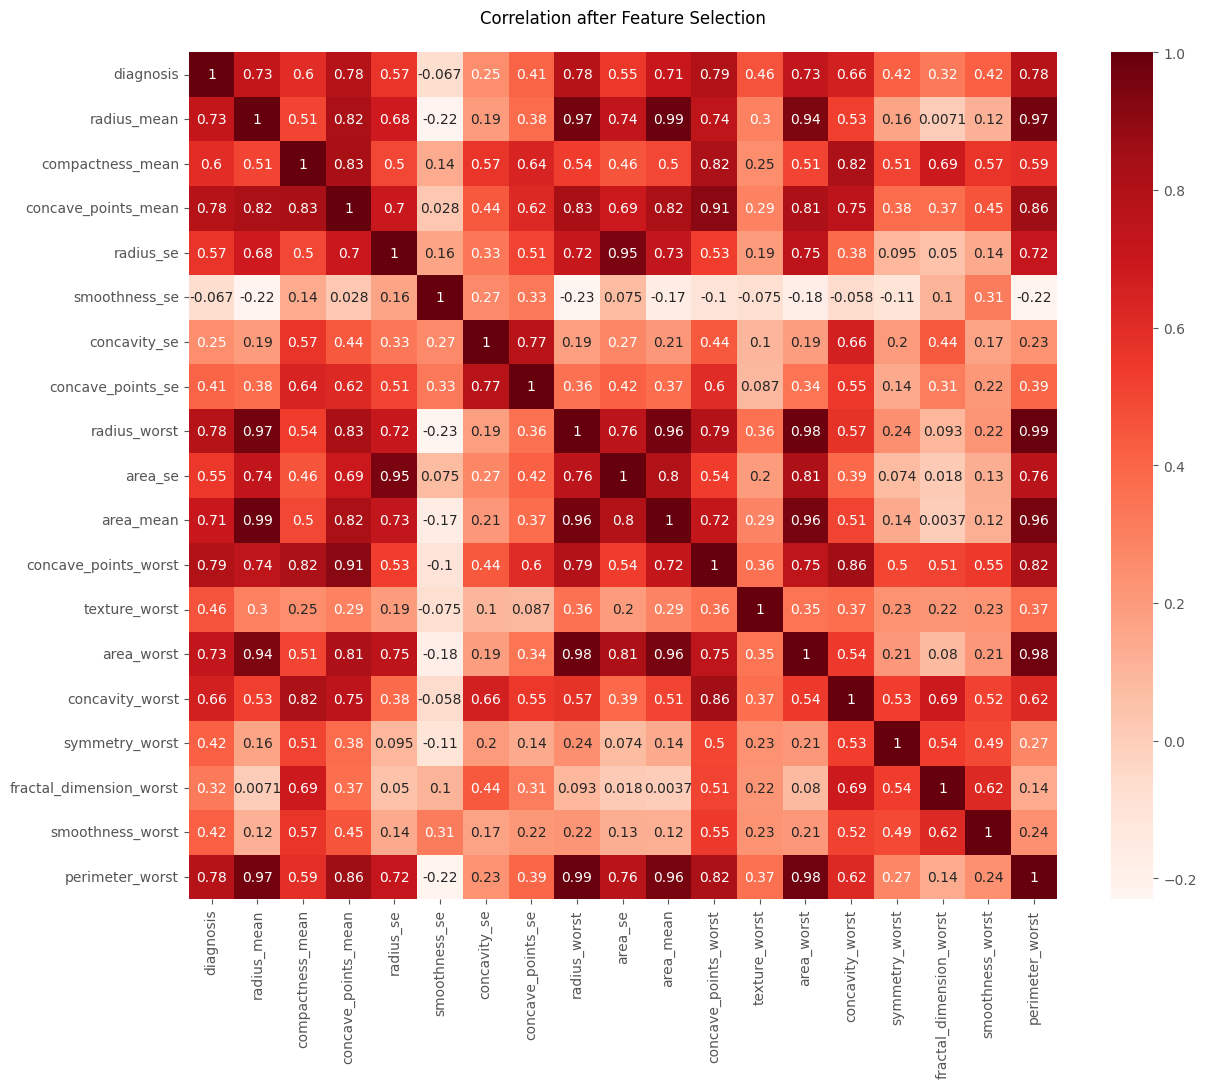

In [337]:
# Using Pearson Correlation
plt.figure(figsize=(14,11))
cor = dataset_befs.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title("Correlation after Feature Selection\n", size=12)
plt.show()

radius_mean is highly corr with radius_worst, area_worst and perimeter_worst which implies multicollinearity.

(area_mean highly corr with radius_mean, remove area_mean)

### Boxplots for Feature Visualization:
The boxplots for different features against the diagnosis are useful for visualizing the distribution of these features across different classes. This can provide insights into which features are more discriminative in terms of the target variable.

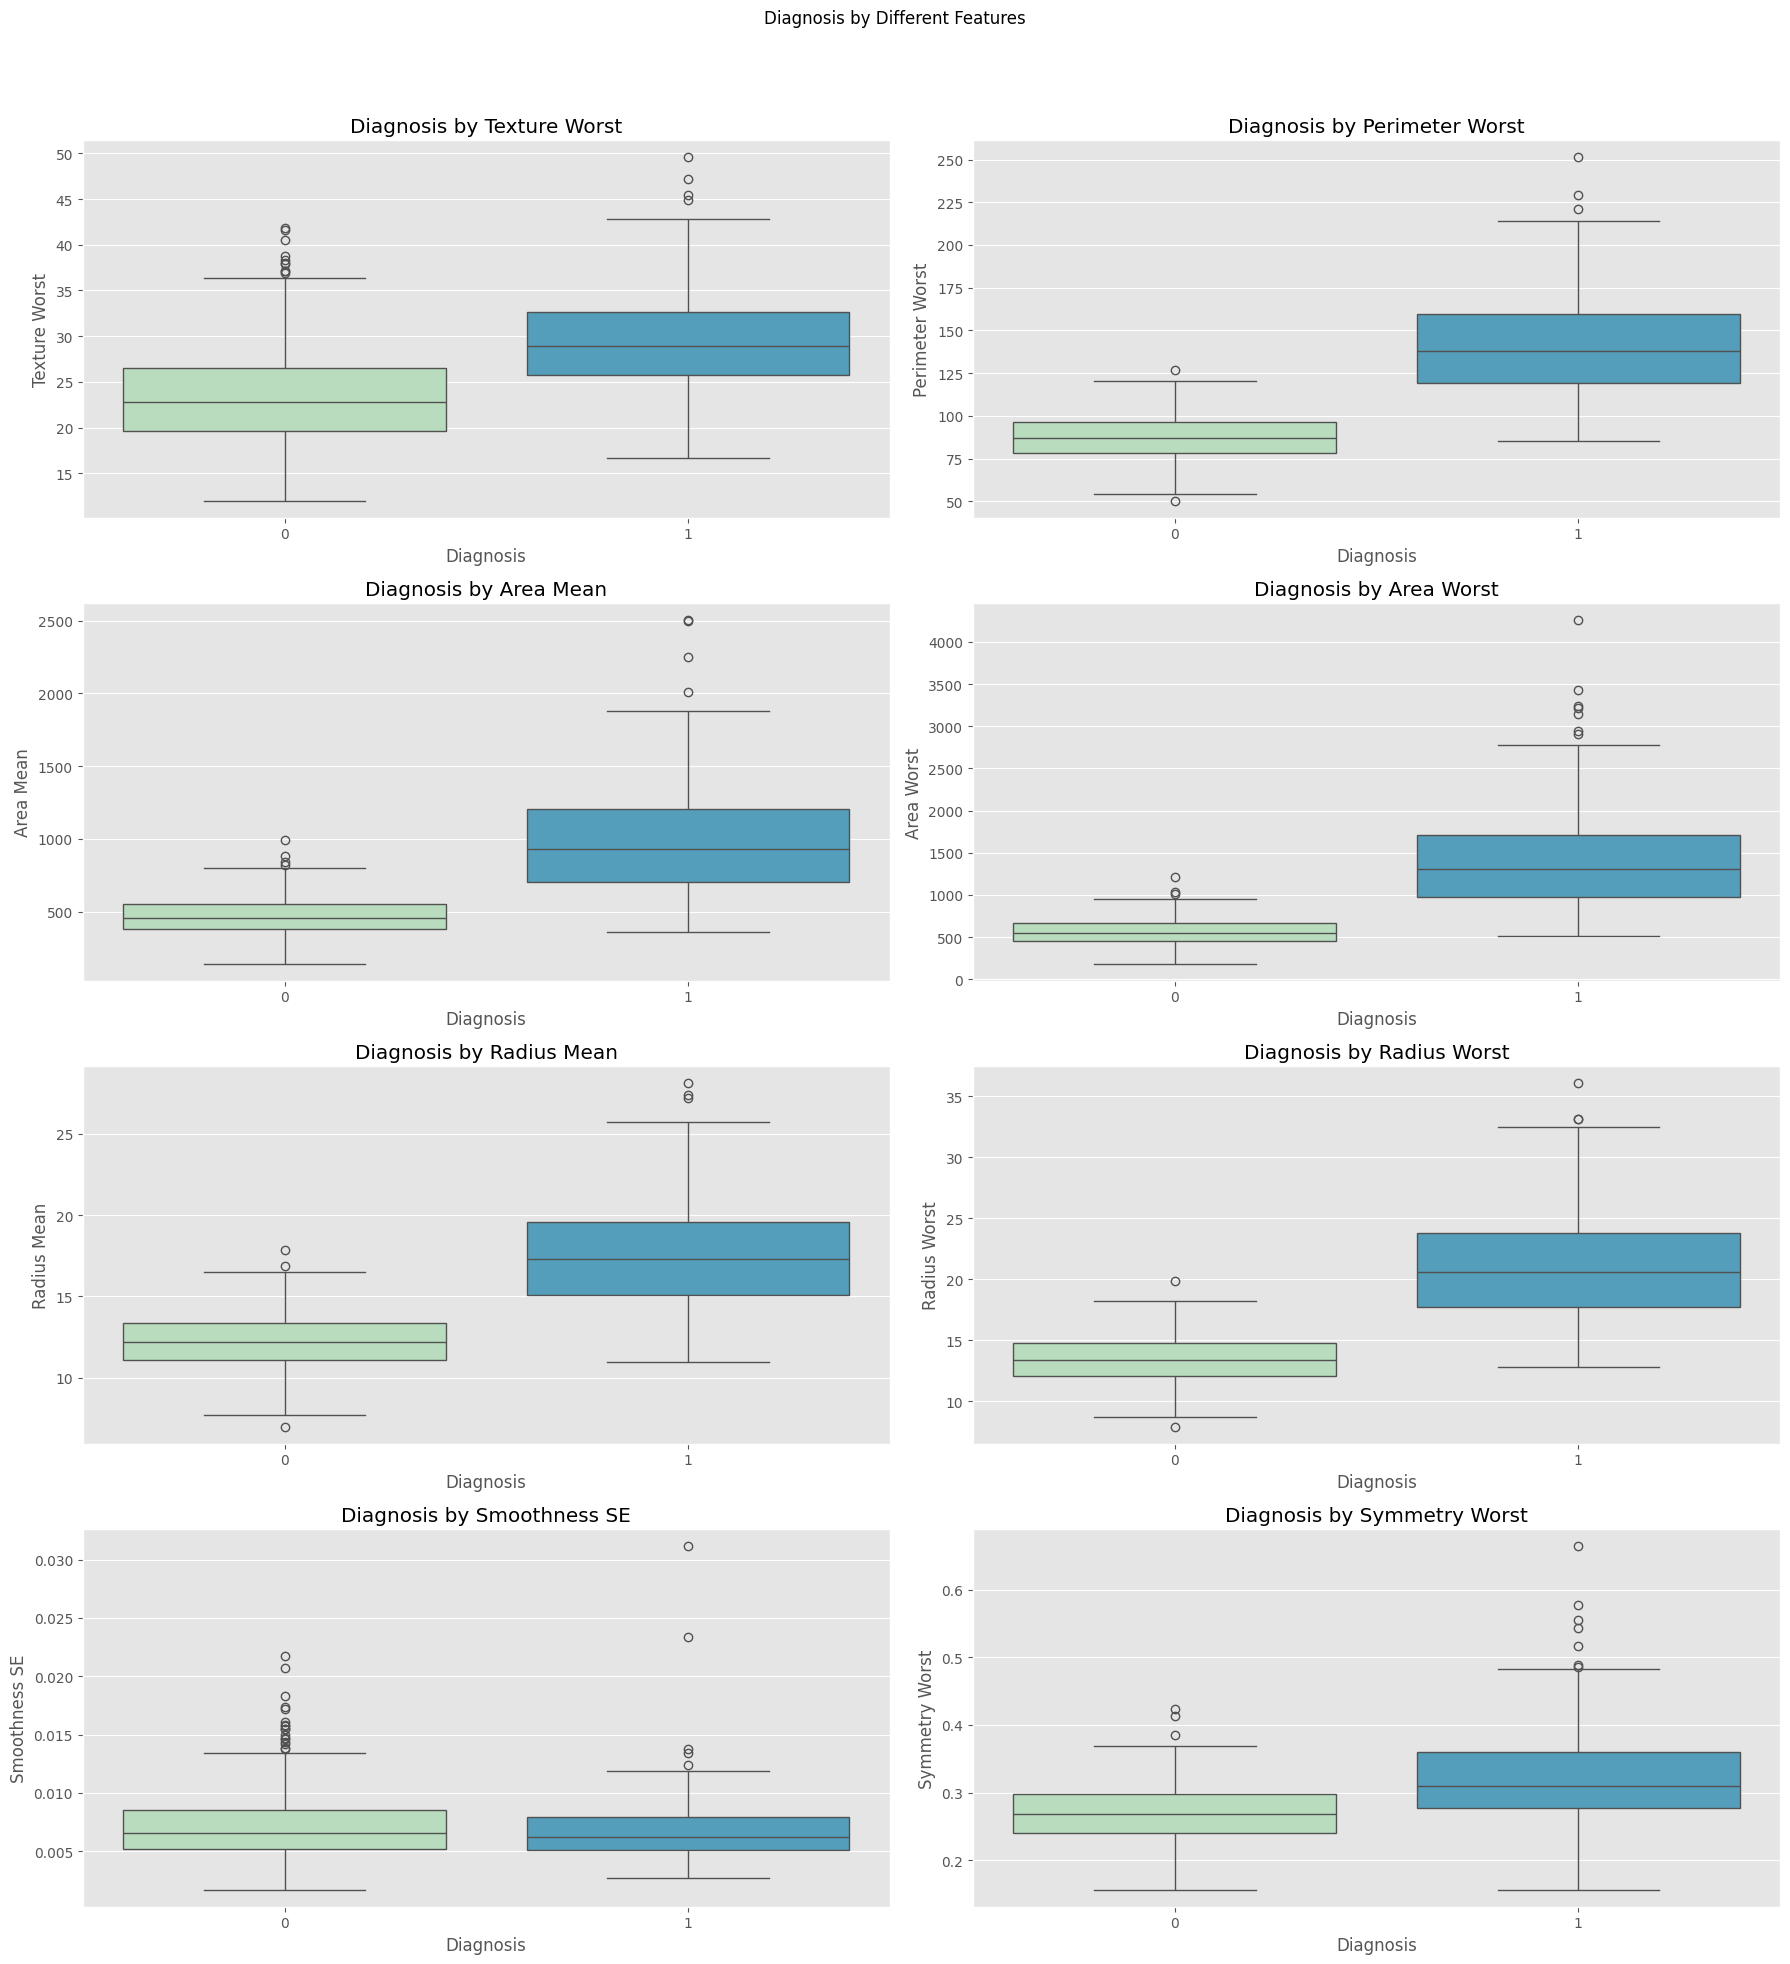

In [338]:
f, axes = plt.subplots(4, 2, figsize=(18, 20), facecolor='white')
f.suptitle('Diagnosis by Different Features')

sns.boxplot(x='diagnosis', y='texture_worst', palette='GnBu', data=dataset_befs, ax=axes[0, 0])
axes[0, 0].set_title("Diagnosis by Texture Worst")
axes[0, 0].set_ylabel("Texture Worst")
axes[0, 0].set_xlabel("Diagnosis")

sns.boxplot(x='diagnosis', y='perimeter_worst', palette='GnBu', data=dataset_befs, ax=axes[0, 1])
axes[0, 1].set_title('Diagnosis by Perimeter Worst')
axes[0, 1].set_ylabel("Perimeter Worst")
axes[0, 1].set_xlabel("Diagnosis")

sns.boxplot(x='diagnosis', y='area_mean', palette='GnBu', data=dataset_befs, ax=axes[1, 0])
axes[1, 0].set_title("Diagnosis by Area Mean")
axes[1, 0].set_ylabel("Area Mean")
axes[1, 0].set_xlabel("Diagnosis")

sns.boxplot(x='diagnosis', y='area_worst', palette='GnBu', data=dataset_befs, ax=axes[1, 1])
axes[1, 1].set_title("Diagnosis by Area Worst")
axes[1, 1].set_ylabel("Area Worst")
axes[1, 1].set_xlabel("Diagnosis")

sns.boxplot(x='diagnosis', y='radius_mean', palette='GnBu', data=dataset_befs, ax=axes[2, 0])
axes[2, 0].set_title("Diagnosis by Radius Mean")
axes[2, 0].set_ylabel("Radius Mean")
axes[2, 0].set_xlabel("Diagnosis")

sns.boxplot(x='diagnosis', y='radius_worst', palette='GnBu', data=dataset_befs, ax=axes[2, 1])
axes[2, 1].set_title("Diagnosis by Radius Worst")
axes[2, 1].set_ylabel("Radius Worst")
axes[2, 1].set_xlabel("Diagnosis")

# 2 examples of low correlation features.
sns.boxplot(x='diagnosis', y='smoothness_se', palette='GnBu', data=dataset_befs, ax=axes[3, 0])
axes[3, 0].set_title("Diagnosis by Smoothness SE")
axes[3, 0].set_ylabel("Smoothness SE")
axes[3, 0].set_xlabel("Diagnosis")

sns.boxplot(x='diagnosis', y='symmetry_worst', palette='GnBu', data=dataset_befs, ax=axes[3, 1])
axes[3, 1].set_title("Diagnosis by Symmetry Worst")
axes[3, 1].set_ylabel("Symmetry Worst")
axes[3, 1].set_xlabel("Diagnosis")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


We can see that the features smoothness_se and symmetry_worst have almost the same values in patients with and without breat cancer - indicating that they are not good features for us.

In [339]:
dataset_fs = dataset_befs
dataset_fs.shape

(569, 19)

# 1. Use K-fold for cross validation using logistic regression

Because I split the data to 5 folds (5 equal parts), each fold will contain approximately 20% if the data.

In each iteration of K-Fold cross validation 4 folds are used as the training set (80%) and 1 fold is used as the validation set.

This process is repeated 5 times (since n_splits=5), and each fold is used exactly once as the validation set.

In [340]:
##############################################################################################
# Prepare dataset for K-Fold
##############################################################################################
array = dataset_fs.values
X_fs = dataset_fs.drop('diagnosis', axis=1)
y_fs = dataset_fs['diagnosis']

print('Class labels:', np.unique(y_fs))

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Standardize the features
scaler = StandardScaler()
X_fs_scaled = scaler.fit_transform(X_fs)

# Set up Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

accuracy_scores = []

for train_index, validation_index in kf.split(X_fs_scaled, y_fs):

    X_train_fs, X_validation_fs = X_fs_scaled[train_index], X_fs_scaled[validation_index]
    y_train_fs, y_validation_fs = y_fs.iloc[train_index], y_fs.iloc[validation_index]
    
    logistic_model = LogisticRegression()
    logistic_model.fit(X_train_fs, y_train_fs)
    
    y_pred = logistic_model.predict(X_validation_fs)
    
    accuracy = accuracy_score(y_validation_fs, y_pred)
    accuracy_scores.append(accuracy)
    
    print(f"Fold Accuracy = {accuracy:.4f}")

    y_pred_initial = logistic_model.predict(X_validation_fs)
    roc_auc_initial = roc_auc_score(y_validation_fs, y_pred_initial)
    precision_initial, recall_initial, f1_score_initial, _ = precision_recall_fscore_support(y_validation_fs, y_pred_initial, average='binary')

    print("Initial Model Performance:")
    print(f"ROC-AUC: {roc_auc_initial}")
    print(f"Precision: {precision_initial}")
    print(f"Recall: {recall_initial}")
    print(f"F1 Score: {f1_score_initial}")
    print("\nClassification Report:\n", classification_report(y_validation_fs, y_pred_initial))

# Calculate and print the average accuracy across all folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"\nAverage accuracy over {kf.get_n_splits()} folds: {average_accuracy:.4f}")




Class labels: [0 1]
Fold Accuracy = 0.9737
Initial Model Performance:
ROC-AUC: 0.9697019325253848
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1 Score: 0.9647058823529412

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Fold Accuracy = 0.9825
Initial Model Performance:
ROC-AUC: 0.9859154929577465
Precision: 0.9555555555555556
Recall: 1.0
F1 Score: 0.9772727272727273

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        71
           1       0.96      1.00      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg      

In [341]:
##############################################################################################
# Prepare dataset with manual spliting
##############################################################################################
array = dataset_fs.values
X_fs = dataset_fs.drop('diagnosis', axis=1)
y_fs = dataset_fs['diagnosis']

print('Class labels:', np.unique(y_fs))

# Standardize the features
scaler = StandardScaler()
X_fs_scaled = scaler.fit_transform(X_fs)

# Store results
models = []
accuracy_scores = []

# Train 5 Logistic Regression models with different 80/20 splits
for i in range(5):

    X_train_fs, X_validation_fs, y_train_fs, y_validation_fs = train_test_split(
        X_fs_scaled, y_fs, test_size=0.2, random_state=i, stratify=y_fs)
    
    logistic_model = LogisticRegression()
    logistic_model.fit(X_train_fs, y_train_fs)
    
    models.append(logistic_model)
    
    y_pred = logistic_model.predict(X_validation_fs)
    
    accuracy = accuracy_score(y_validation_fs, y_pred)
    accuracy_scores.append(accuracy)
    
    print(f"Iteration {i+1} Accuracy: {accuracy:.4f}")

# Calculate and print the average accuracy across all iterations
average_accuracy = np.mean(accuracy_scores)
print(f"\nAverage accuracy over 5 iterations: {average_accuracy:.4f}")

Class labels: [0 1]
Iteration 1 Accuracy: 0.9561
Iteration 2 Accuracy: 0.9737
Iteration 3 Accuracy: 0.9561
Iteration 4 Accuracy: 0.9825
Iteration 5 Accuracy: 0.9561

Average accuracy over 5 iterations: 0.9649


# 2. Use randomized 50% of the data

In [342]:
##############################################################################################
# Prepare dataset manually
##############################################################################################
array = dataset_fs.values
X_fs = dataset_fs.drop('diagnosis', axis=1)
y_fs = dataset_fs['diagnosis']

print('Class labels:', np.unique(y_fs))

# Standardize the features
scaler = StandardScaler()
X_fs_scaled = scaler.fit_transform(X_fs)

accuracy_scores = []

for i in range(5):
    # Draw 50% of the data for training, and use the rest for validation
    X_train_fs, X_validation_fs, y_train_fs, y_validation_fs = train_test_split(
        X_fs_scaled, y_fs, train_size=0.5, random_state=None, stratify=y_fs)
    
    logistic_model = LogisticRegression()
    logistic_model.fit(X_train_fs, y_train_fs)
    
    y_pred = logistic_model.predict(X_validation_fs)
    
    accuracy = accuracy_score(y_validation_fs, y_pred)
    accuracy_scores.append(accuracy)
    
    print(f"Iteration {i+1} Accuracy: {accuracy:.4f}")

# Calculate and print the average accuracy across all iterations
average_accuracy = np.mean(accuracy_scores)
print(f"\nAverage accuracy over 5 iterations: {average_accuracy:.4f}")

Class labels: [0 1]
Iteration 1 Accuracy: 0.9825
Iteration 2 Accuracy: 0.9614
Iteration 3 Accuracy: 0.9754
Iteration 4 Accuracy: 0.9825
Iteration 5 Accuracy: 0.9860

Average accuracy over 5 iterations: 0.9775


In [343]:
##############################################################################################
# Prepare dataset for K-Fold
##############################################################################################
array = dataset_fs.values
X_fs = dataset_fs.drop('diagnosis', axis=1)
y_fs = dataset_fs['diagnosis']

print('Class labels:', np.unique(y_fs))

# Standardize the features
scaler = StandardScaler()
X_fs_scaled = scaler.fit_transform(X_fs)

# Set up Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

accuracy_scores = []

for train_index, validation_index in kf.split(X_fs_scaled, y_fs):
    # From the training indices, randomly select 50% for actual training
    X_train_kfold, _, y_train_kfold, _ = train_test_split(X_fs_scaled[train_index], y_fs.iloc[train_index], train_size=0.5, random_state=None, stratify=y_fs.iloc[train_index])
    
    X_validation_fs = X_fs_scaled[validation_index]
    y_validation_fs = y_fs.iloc[validation_index]
    
    logistic_model = LogisticRegression()
    logistic_model.fit(X_train_kfold, y_train_kfold)
    
    y_pred = logistic_model.predict(X_validation_fs)
    
    accuracy = accuracy_score(y_validation_fs, y_pred)
    accuracy_scores.append(accuracy)
    
    print(f"Fold Accuracy = {accuracy:.4f}")

# Calculate and print the average accuracy across all folds
average_accuracy = np.mean(accuracy_scores)
print(f"\nAverage accuracy over {kf.get_n_splits()} folds: {average_accuracy:.4f}")

Class labels: [0 1]
Fold Accuracy = 0.9649
Fold Accuracy = 0.9825
Fold Accuracy = 0.9649
Fold Accuracy = 0.9737
Fold Accuracy = 0.9823

Average accuracy over 5 folds: 0.9737


# 3. Implement adaboost with LR

In [344]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class AdaBoostLogisticRegression:
    def __init__(self, n_estimators=19):
        self.n_estimators = n_estimators
        self.models = []
        self.model_weights = []
    
    def init_args(self, X, y):
        self.X = X
        self.y = y
        self.n_samples, self.n_features = X.shape
        # Initialize weights uniformly
        self.weights = np.ones(self.n_samples) / self.n_samples
    
    def _alpha(self, error):
        # Calculate alpha (model weight) based on the error
        return 0.5 * np.log((1 - error) / error)
    
    def _Z(self):
        # Normalize weights
        self.weights /= np.sum(self.weights)
    
    def _w(self, a, predictions):
        # Update weights
        self.weights *= np.exp(-a * self.y * (2 * predictions - 1))
    
    def fit(self, X, y):
        self.init_args(X, y)
        
        for i in range(self.n_estimators):
            # Train Logistic Regression model with current weights
            model = LogisticRegression()
            model.fit(X, y, sample_weight=self.weights)
            predictions = model.predict(X)
            
            # Calculate error
            incorrect = (predictions != y).astype(int)
            error = np.dot(self.weights, incorrect) / np.sum(self.weights)
            
            # This condition is meant to stop adding more weak learners if the current one is better.
            # print(f"Iteration {i+1}, Error: {error:.4f}")
            if error >= 0.5:
                print("Stopping early due to high error.")
                break
            
            # Calculate model weight
            a = self._alpha(error)
            self.model_weights.append(a)
            self.models.append(model)
            
            # Update weights
            self._w(a, predictions)
            self._Z()
    
    def predict(self, X):
        final_predictions = np.zeros(X.shape[0])
        
        for model, model_weight in zip(self.models, self.model_weights):
            predictions = model.predict(X)
            final_predictions += model_weight * predictions
        
        return np.sign(final_predictions)

# Usage with 5 different 80/20 splits
split_accuracy_scores = []
n_estimators = 10

# Prepare your dataset
array = dataset_fs.values
X_fs = dataset_fs.drop('diagnosis', axis=1)
y_fs = dataset_fs['diagnosis']

# Standardize the features
scaler = StandardScaler()
X_fs_scaled = scaler.fit_transform(X_fs)

# Train 5 different models with different 80/20 splits
for i in range(5):
    X_train_fs, X_validation_fs, y_train_fs, y_validation_fs = train_test_split(
        X_fs_scaled, y_fs, test_size=0.2, random_state=i, stratify=y_fs)
    
    # Initialize and train the AdaBoost model with Logistic Regression
    adaboost_lr = AdaBoostLogisticRegression(n_estimators=n_estimators)
    adaboost_lr.fit(X_train_fs, y_train_fs)
    
    # Make predictions on the validation set
    y_validation_pred = adaboost_lr.predict(X_validation_fs)
    
    # Evaluate the model
    accuracy = accuracy_score(y_validation_fs, y_validation_pred)
    split_accuracy_scores.append(accuracy)
    print(f"Split {i+1} Accuracy: {accuracy:.4f}")

# Calculate and print the average accuracy across all splits
average_accuracy = np.mean(split_accuracy_scores)
print(f"\nAverage accuracy over 5 splits: {average_accuracy:.4f}")


Split 1 Accuracy: 0.8158
Split 2 Accuracy: 0.8860
Split 3 Accuracy: 0.8947
Split 4 Accuracy: 0.8070
Split 5 Accuracy: 0.8684

Average accuracy over 5 splits: 0.8544
